<a href="https://colab.research.google.com/github/AIDA-DA/aida-project-image-scene/blob/daniel/Intuitive_Feature_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook extracts human intuitive and rule based features like RGB and Edge Spectren.
For example:

1.   Forests are green, mountains and glaciers are blue.
2.   Forests have many vertical edges because of the vertical trunks of the trees.
3.   Streets have many vertical, horizontal edges because of the buildings. 
4.   Streets have many vertical, horizontal edges because of the buildings. 




In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Kaggle

In [ ]:
#/content/drive/MyDrive/Kaggle/kaggle.json

kaggle_dir = "/content/gdrive/My Drive/Kaggle"

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = kaggle_dir

In [ ]:
%pwd

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

In [ ]:
%pwd

'/content/gdrive/My Drive/Kaggle'

In [ ]:
%ls

kaggle.json  seg_pred/  seg_test/  seg_train/


In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_files('puneet6060/intel-image-classification', unzip=True)

# Globals and Constants

In [2]:
import os
#images_dir_train = '/content/gdrive/MyDrive/Kaggle/seg_train/seg_train'
images_dir_train = '/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train'
images_dir_test  = '/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_test/seg_test'


In [3]:
RED   = 0
GREEN = 1
BLUE  = 2

COlOR_SCALE = 255.0
COLOR_RANGE= (0, COlOR_SCALE)

EDGE_RANGE = (500, 1000)


In [4]:
class_names = os.listdir(images_dir_train)
n_classes = len(class_names)

In [5]:
print('class_names: ', class_names)
print('n_classes: ', n_classes)

class_names:  ['buildings', 'mountain', 'glacier', 'sea', 'street', 'forest']
n_classes:  6


# Download some images

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [7]:
BATCH_SIZE = 32

In [8]:
image_gen = ImageDataGenerator(  #rescale=1./255.,    # ORB
                                   #rotation_range=45,
                                   #width_shift_range=0.5,
                                   #height_shift_range=0.5,
                                   #shear_range=5,
                                   #zoom_range=0.7,
                                   #horizontal_flip=True,
                                   #vertical_flip=True,
                                  )

In [9]:
train_img_iterator = image_gen.flow_from_directory( 
                                    images_dir_train,
                                    #target_size = TARGET_SIZE,
                                    batch_size  = BATCH_SIZE,
                                    class_mode  = 'categorical',
                                    #shuffle     = True
                                    )

test_img_iterator = image_gen.flow_from_directory( 
                                    images_dir_test,
                                    #target_size = TARGET_SIZE,
                                    batch_size  = BATCH_SIZE,
                                    class_mode  = 'categorical',
                                    #shuffle     = True
                                    )

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [10]:
train_img_iterator.num_classes

6

In [11]:
train_img_iterator.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [12]:
class_index_dict = {y:x for x,y in train_img_iterator.class_indices.items()}
class_index_dict

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

## Classes Distribution

<BarContainer object of 6 artists>

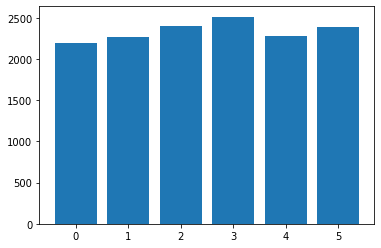

In [ ]:
b_cnt, b__ = np.histogram(train_img_iterator.classes, bins=train_img_iterator.num_classes)
plt.bar( range(train_img_iterator.num_classes), b_cnt )

In [ ]:
train_img_iterator.filenames[ :5]

['buildings/0.jpg',
 'buildings/10006.jpg',
 'buildings/1001.jpg',
 'buildings/10014.jpg',
 'buildings/10018.jpg']

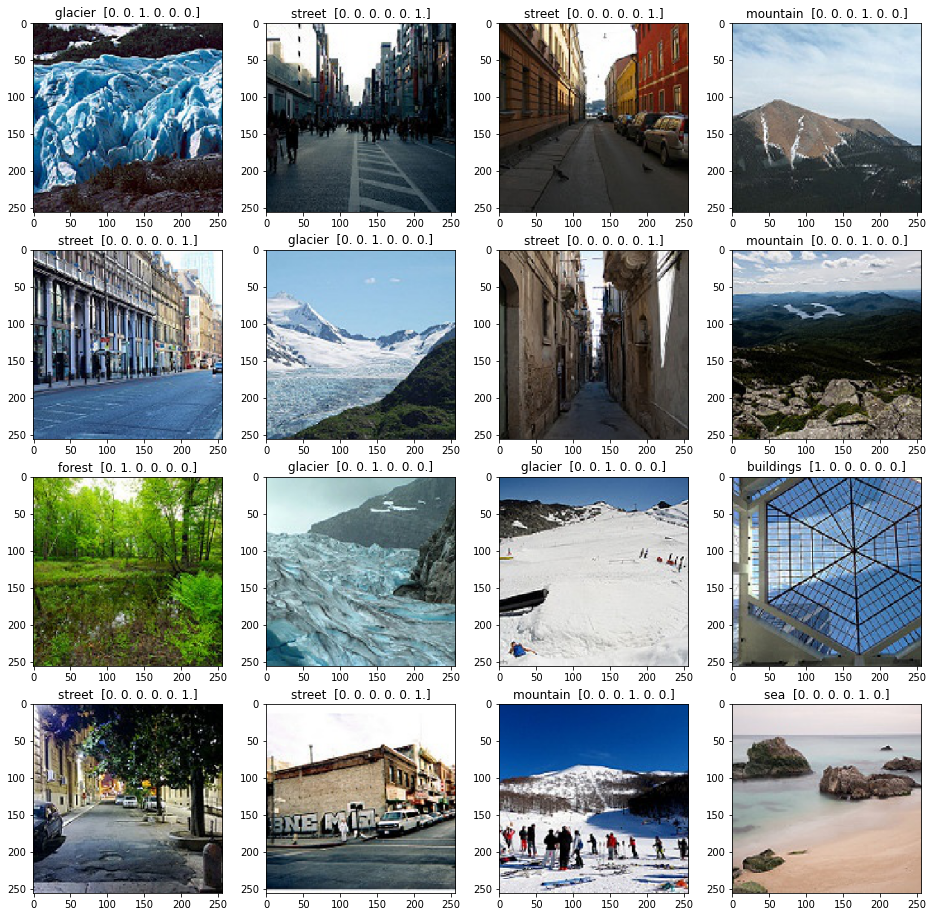

In [ ]:
data_batch = train_img_iterator.next()

#class_index_dict = {y:x for x,y in train_img_iterator.class_indices.items()}

imgs   = data_batch[0]
labels = data_batch[1]

fig__, axs = plt.subplots(4, round(imgs.shape[0]/4), figsize=(16,16))

for i in range(BATCH_SIZE):
  axs.flat[i].imshow(imgs[i])
  axs.flat[i].set_title( str(  str(class_index_dict[np.argmax(labels[i])])[:10] + '  ' + str(labels[i])) )
#  axs.flat[i].set_title( labels[i] )
plt.show()

# Color Spectren

In [13]:
def get_RGB_mean(img):
  r = round( img[:,:,0].mean(), 1)
  g = round( img[:,:,1].mean(), 1)
  b = round( img[:,:,2].mean(), 1)
  return r,g,b

def get_RGB_max(img):
  r = round( img[:,:,0].max(), 1)
  g = round( img[:,:,1].max(), 1)
  b = round( img[:,:,2].max(), 1)
  return r,g,b

def get_RGB_min(img):
  r = round( img[:,:,0].min(), 1)
  g = round( img[:,:,1].min(), 1)
  b = round( img[:,:,2].min(), 1)
  return r,g,b

def get_RGB_std(img):
  r = round( img[:,:,0].std(), 1)
  g = round( img[:,:,1].std(), 1)
  b = round( img[:,:,2].std(), 1)
  return r,g,b


## Color Spectrum for different Classes

In [14]:
def get_Histogramm(img, channel, range=(0.0, 1.0), steps_=4):
  return np.histogram( img[ : : steps_, : : steps_, channel].flatten(), range=range )

In [15]:

def plot_RGB_Histogram( img, range_=(0.0, 1.0) ):

  fig__, axs = plt.subplots(1, 4, figsize=(30,4))
  axs.flat[0].imshow(img)

  b_cnt, b__ = get_Histogramm(img, RED, range=range_)
  #print('b_cnt', b_cnt)
  axs.flat[1].bar( range(len(b_cnt)), b_cnt, color='red')

  b_cnt, b__ = get_Histogramm(img, GREEN, range=range_)
  axs.flat[2].bar( range(len(b_cnt)), b_cnt, color='green')

  b_cnt, b__ = get_Histogramm(img, BLUE, range=range_)
  axs.flat[3].bar( range(len(b_cnt)), b_cnt, color='blue')

  plt.show()


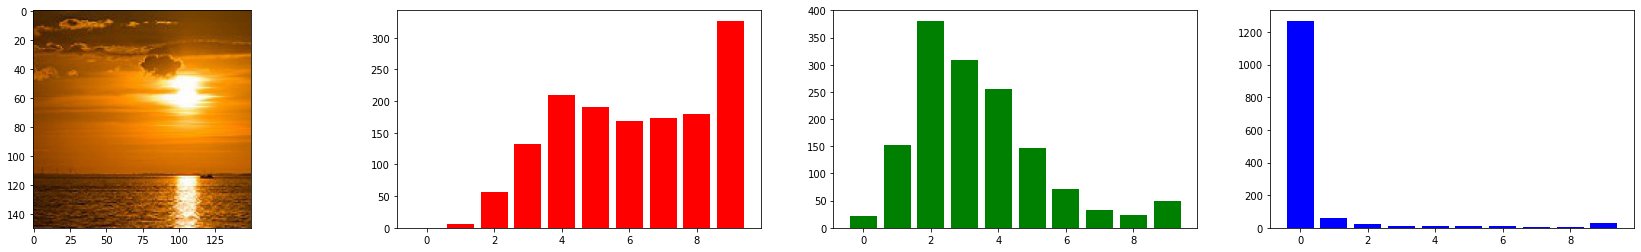

In [16]:
plot_RGB_Histogram( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/sea/200.jpg'), range_=(0,255.0) )

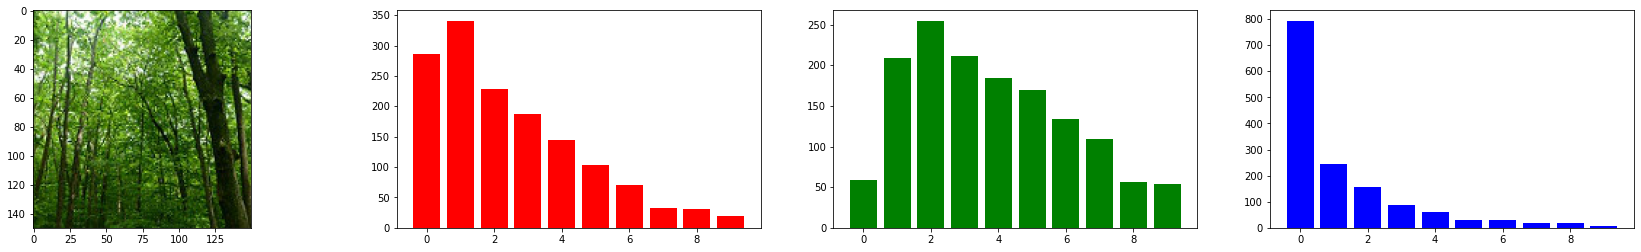

In [ ]:
plot_RGB_Histogram( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/forest/8.jpg'), range_=(0,255.0) )

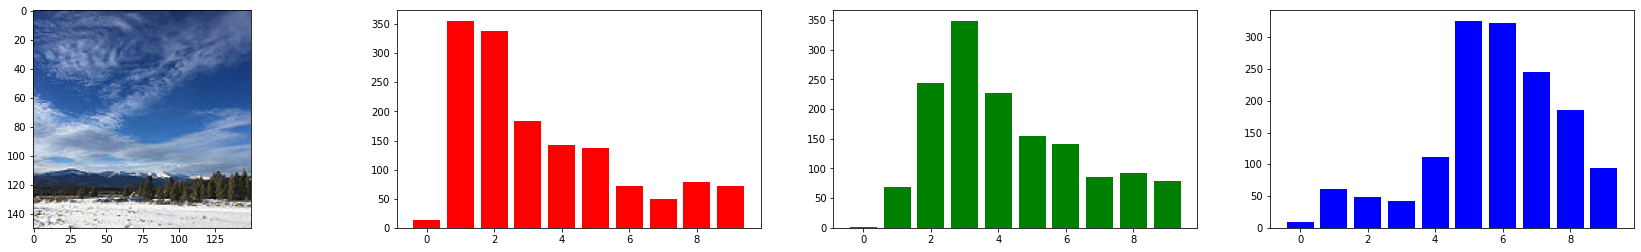

In [ ]:
plot_RGB_Histogram( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/mountain/32.jpg'), range_=(0,255.0) )

# ORB, SURF, SWIFT Feature Descriptors

### Result: These Feature-Descriptors generates correlation-patterns, which can be used by cross-corraltion to find the same objectpart with the same pattern in a other picture. Count of features depending of object, edges, threshold, .... so it's not a general description of images like the color-spectrum or the frequence-spectrum.


## Conclusion: Not a good generalizing image descriptor, these are specific feature descriptors to find same objects/pattern in a second image.

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/sea/200.jpg',0)
img = plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/sea/200.jpg')


orb = cv2.ORB_create()
#orb = cv2.SURF()
kp, des = orb.detectAndCompute(img, None)


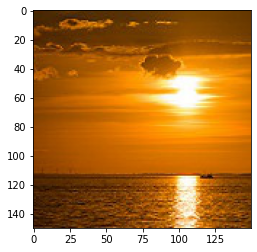

In [ ]:
plt.imshow(img)

In [ ]:
print('orb.getEdgeThreshold()',orb.getEdgeThreshold() )
print('orb.getFastThreshold()',orb.getFastThreshold() )
print('orb.getFirstLevel()', orb.getFirstLevel())
print('orb.getMaxFeatures()',orb.getMaxFeatures() )
print('orb.getNLevels()', orb.getNLevels())
print('orb.getPatchSize()', orb.getPatchSize())
print('orb.getScoreType()', orb.getScoreType())
print('orb.getScaleFactor()', orb.getScaleFactor())
print('orb.getWTA_K()',orb.getWTA_K())
print('orb.descriptorSize()', orb.descriptorSize() )

orb.getEdgeThreshold() 10
orb.getFastThreshold() 20
orb.getFirstLevel() 0
orb.getMaxFeatures() 500
orb.getNLevels() 8
orb.getPatchSize() 31
orb.getScoreType() 0
orb.getScaleFactor() 1.2000000476837158
orb.getWTA_K() 2
orb.descriptorSize() 32


In [ ]:
orb.setEdgeThreshold(5)# 31
orb.setFastThreshold(3) #20
orb.setPatchSize(8)     # 31
orb.setMaxFeatures(30)  # 500

In [ ]:
kp, des = orb.detectAndCompute(img, None)

In [ ]:
des.shape

(30, 32)

In [ ]:
des[ :2,  : ]

array([[168, 208, 104, 197, 134,  70,  30, 248, 105, 217,  84, 233, 195,
        180, 231,  64, 241,  64, 227, 115,  41, 195,  84,   0,  68, 251,
         62,  20,  58, 128, 180,  10],
       [168, 208, 120, 197, 134,  70,  30, 248, 105, 187,  92, 233, 195,
        180, 231,  64, 240,  64, 227, 115,  41, 195,  84,   0,  68, 255,
         62,  20,  42, 128, 180,  10]], dtype=uint8)

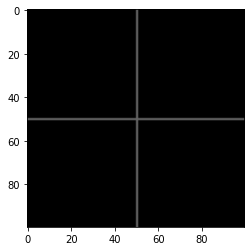

In [ ]:
img2 = np.zeros( (100, 100, 3), dtype=np.uint8 ) 

img2[       :, 50::50 ] = 100
img2[  50::50, :      ] = 100

plt.imshow(img2)

In [ ]:
kp, des = orb.detectAndCompute(img2, None)

In [ ]:
for i in range(len(kp)):
  print(kp[i].pt)

(46.80000305175781, 46.80000305175781)
(52.80000305175781, 46.80000305175781)
(49.20000076293945, 49.20000076293945)
(46.80000305175781, 52.80000305175781)
(52.80000305175781, 52.80000305175781)
(46.08000183105469, 46.08000183105469)
(53.28000259399414, 46.08000183105469)
(48.96000289916992, 48.96000289916992)
(46.08000183105469, 53.28000259399414)
(53.28000259399414, 53.28000259399414)
(53.5680046081543, 53.5680046081543)
(50.112003326416016, 50.112003326416016)
(53.5680046081543, 44.92800521850586)
(44.92800521850586, 53.5680046081543)
(53.91360855102539, 53.91360855102539)
(49.76640701293945, 49.76640701293945)
(53.91360855102539, 43.54560470581055)
(43.54560470581055, 53.91360855102539)
(54.7430534362793, 54.7430534362793)
(49.76641082763672, 49.76641082763672)
(54.7430534362793, 42.301448822021484)
(42.301448822021484, 54.7430534362793)
(47.7757568359375, 47.7757568359375)
(41.80378723144531, 41.80378723144531)
(50.164546966552734, 50.164546966552734)


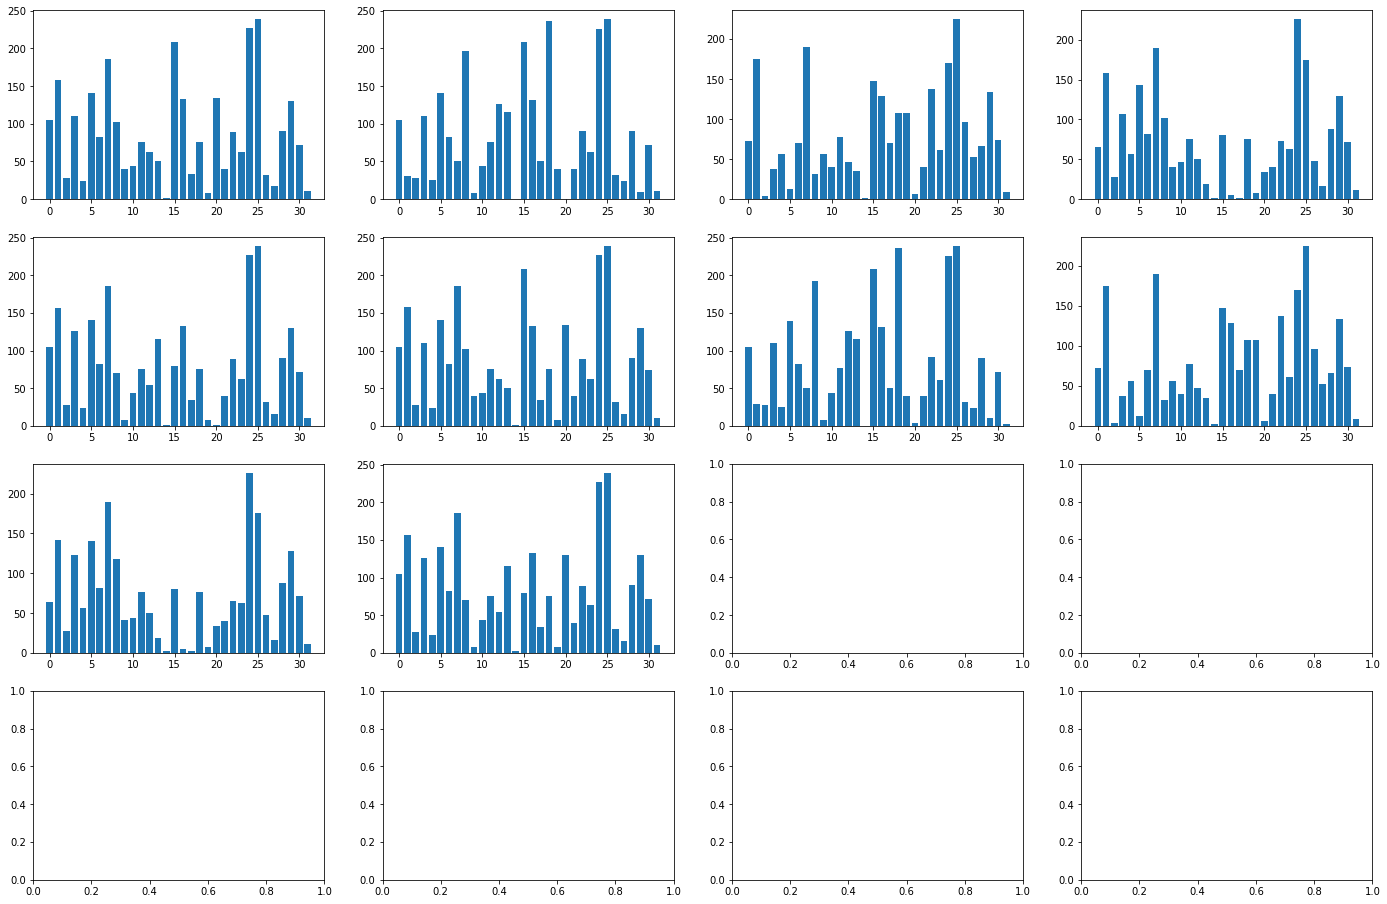

In [ ]:
fig__, axs = plt.subplots(4, 4, figsize=(24,16))

for i in range(len(des)):
  axs.flat[i].bar( range( len(des[i]) ) , des[i], )
  if i >= 16:
    break
plt.show()

In [ ]:
def descriptor(des_, len_=10, pref_='d_'):

  if des_ is None:
    return dict_from_bins_4digits( np.zeros( (len_,), dtype=np.uint8 ), pref_)

  if des_.size > len_:
    return dict_from_bins_4digits( des_.flatten()[ :len_], pref_)
  else:
    return dict_from_bins_4digits( np.resize(des_, (len_)), pref_)

descriptor(des)

{'d_0000': 105,
 'd_0001': 158,
 'd_0002': 28,
 'd_0003': 110,
 'd_0004': 24,
 'd_0005': 141,
 'd_0006': 82,
 'd_0007': 186,
 'd_0008': 102,
 'd_0009': 40}

# Edge Spectren

In [17]:
from scipy import signal
import numpy as np


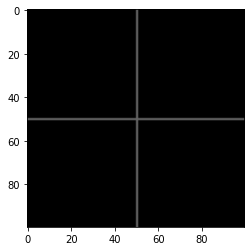

In [ ]:
img = np.zeros( (100, 100, 3), dtype=np.uint8 ) 

img[       :, 50::50 ] = 100
img[  50::50, :      ] = 100

plt.imshow(img);  plt.show()

## Edge Convolution Filter

In [18]:
# kern_vert = np.asarray([[-1, 0, 0, 0, 1],
#                         [-2, 0, 0, 0, 2],
#                         [-2, 0, 0, 0, 2],
#                         [-2, 0, 0, 0, 2],
#                         [-2, 0, 0, 0, 2],
#                         [-2, 0, 0, 0, 2],
#                         [-2, 0, 0, 0, 2],
#                         [-1, 0, 0, 0, 1]])
# kern_horz = np.asarray( [[  2 ],
#                          [  0 ],
#                          [ -2 ]])
# kern_dia_2 = np.asarray([[ 0, 0, 2],
#                          [ 0, 0, 0],
#                          [-2, 0, 0]])
# kern_vert = np.asarray([[-1, 0, 0, 0, 1]])

#kern_vert = np.asarray([[-2, 0, 2]])

kern_vert = np.asarray([ [-1, 0, 1],
                         [-2, 0, 2],
                         [-2, 0, 2],
                         [-2, 0, 2],
                         [-1, 0, 1]])

kern_horz = np.asarray( [[  1, 2, 2, 2, 1],
                         [  0, 0, 0, 0, 0],
                         [ -1,-2,-2,-2,-1]])

kern_dia_1 = np.asarray([[ 0, 0, 0, 2, 0],
                         [ 0, 0, 2, 0,-2],
                         [ 0, 2, 0,-2, 0],
                         [ 2, 0,-2, 0, 0],
                         [ 0,-2, 0, 0, 0 ]])

kern_dia_2 = np.asarray([[ 0, 2, 0, 0, 0],
                         [-2, 0, 2, 0, 0],
                         [ 0,-2, 0, 2, 0],
                         [ 0, 0,-2, 0, 2],
                         [ 0, 0, 0,-2, 0 ]])


In [19]:

def get_HistogramEdge(img_conv, range_):
  return  np.histogram( np.abs( img_conv.flatten() ), range=range_) 
 

In [20]:
def show_edge_images(img):

  img_vert = signal.convolve2d(img[ :,:,0], kern_vert)
  img_horz = signal.convolve2d(img[ :,:,0], kern_horz)

  img_dia_1 = signal.convolve2d(img[ :,:,0], kern_dia_1)
  img_dia_2 = signal.convolve2d(img[ :,:,0], kern_dia_2)

  fig__, axs = plt.subplots(2, 5, figsize=(24,16))

  axs.flat[0].imshow(img)
  axs.flat[1].imshow(img_vert, cmap='gray');  axs.flat[1].set_title( 'vertical' )
  axs.flat[2].imshow(img_horz, cmap='gray');  axs.flat[2].set_title( 'horizontal' )
  axs.flat[3].imshow(img_dia_1, cmap='gray'); axs.flat[3].set_title( 'left diagonal' )
  axs.flat[4].imshow(img_dia_2, cmap='gray'); axs.flat[4].set_title( 'right diagonal' )


  b_cnt, b__ = get_HistogramEdge(img_vert, EDGE_RANGE)
  axs.flat[6].bar( range(len(b_cnt)), b_cnt, color='red');  axs.flat[6].set_title( 'vertical edge' )
  print('vert edge:', b_cnt)
  print('vert edge:', b__)

  b_cnt, b__ = get_HistogramEdge(img_horz, EDGE_RANGE)
  axs.flat[7].bar( range(len(b_cnt)), b_cnt, color='red');  axs.flat[7].set_title( 'horizontal edge' )
  print('horz edge:', b_cnt)
  print('horz edge:', b__)

  b_cnt, b__ = get_HistogramEdge(img_dia_1, EDGE_RANGE)
  axs.flat[8].bar( range(len(b_cnt)), b_cnt, color='red');  axs.flat[8].set_title( 'left diagonal' )
  print('dia1:', b_cnt)
  print('dia1:', b__)

  b_cnt, b__ = get_HistogramEdge(img_dia_2, EDGE_RANGE)
  axs.flat[9].bar( range(len(b_cnt)), b_cnt, color='red');  axs.flat[9].set_title( 'right diagonal' )
  print('dia2:', b_cnt)
  print('dia2:', b__)

  plt.show()

In [21]:
def histogram_edge_images(img):

  ret_arr = np.array([])

  # for all three RGB-Channels separat
  for c in range( 3):
    img_vert = signal.convolve2d(img[ :,:,c], kern_vert)
    img_horz = signal.convolve2d(img[ :,:,c], kern_horz)

    img_dia_1 = signal.convolve2d(img[ :,:,c], kern_dia_1)
    img_dia_2 = signal.convolve2d(img[ :,:,c], kern_dia_2)

    b_cnt1, b__ = get_HistogramEdge(img_vert, EDGE_RANGE)
    b_cnt2, b__ = get_HistogramEdge(img_horz, EDGE_RANGE)
    b_cnt3, b__ = get_HistogramEdge(img_dia_1, EDGE_RANGE)
    b_cnt4, b__ = get_HistogramEdge(img_dia_2, EDGE_RANGE)

    ret_arr = np.concatenate( (ret_arr, b_cnt1, b_cnt2, b_cnt3, b_cnt4))

  return ret_arr


In [89]:
h = histogram_edge_images(plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/sea/200.jpg') )

In [ ]:
dict_from_bins_3digits(h, col_prefix='e_')

In [22]:
def show_edge_histogram(img):

  h = histogram_edge_images(img)

  fig__, axs = plt.subplots(1, 2, figsize=(24,4))

  axs.flat[0].imshow(img)
  axs.flat[1].bar( range(len(h)), h, color='red');  axs.flat[1].set_title( 'RGB Edge Spectrum' )

  plt.show()

vert edge: [47 25  7 12  7 12 31 34 32 28]
vert edge: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
horz edge: [155  79 123 127  88  69  67  58  78  40]
horz edge: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
dia1: [63 27  8  3  1  1  0  0  0  0]
dia1: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
dia2: [56 15  7  3  2  0  1  0  0  0]
dia2: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]


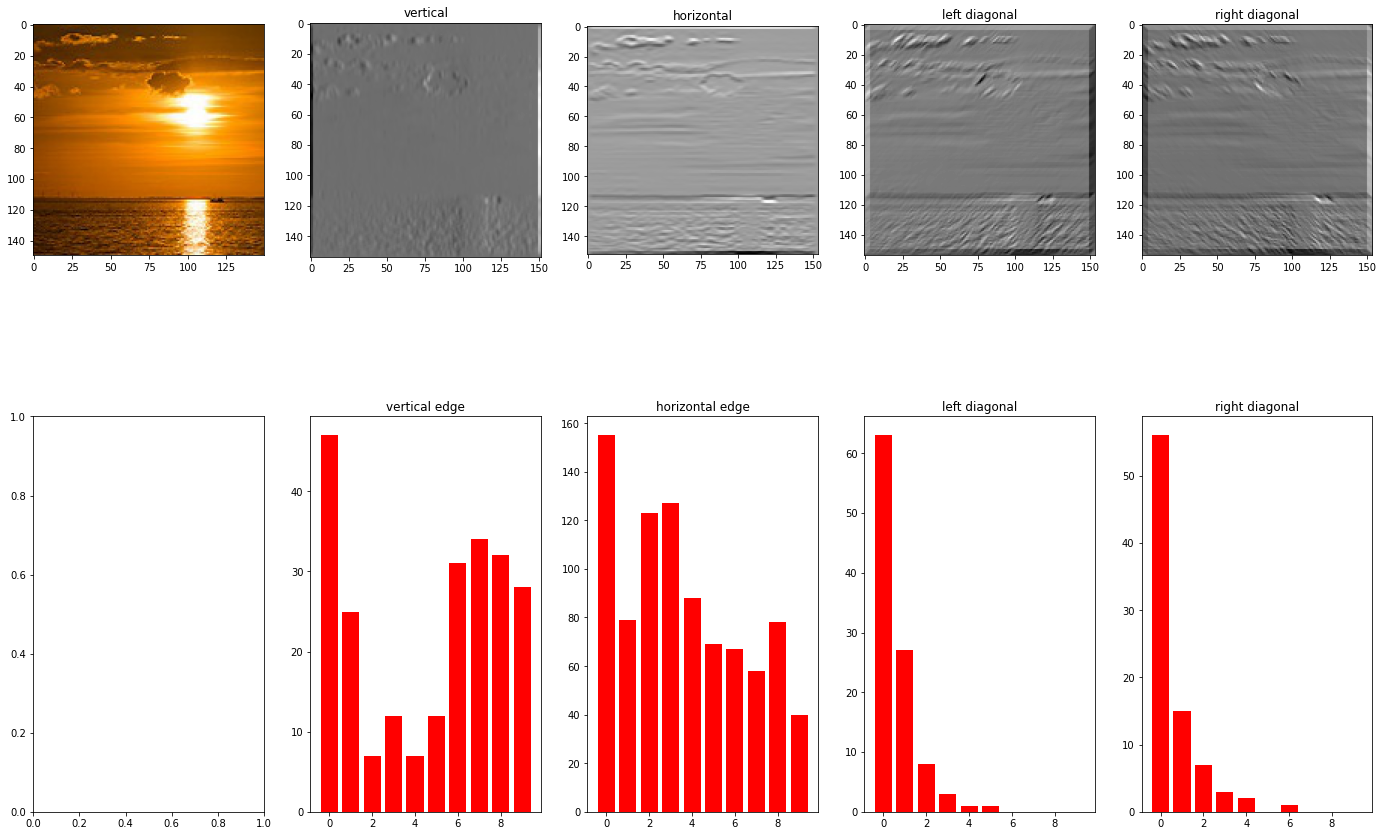

In [23]:
show_edge_images( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/sea/200.jpg') )

vert edge: [428 333 284 208 179 144 126  79  70  46]
vert edge: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
horz edge: [210 153 115  59  44  26  22  12  20  16]
horz edge: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
dia1: [174 114  70  41  36  19  12   5   5   5]
dia1: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
dia2: [214 133  85  63  36  24  14  13   7   8]
dia2: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]


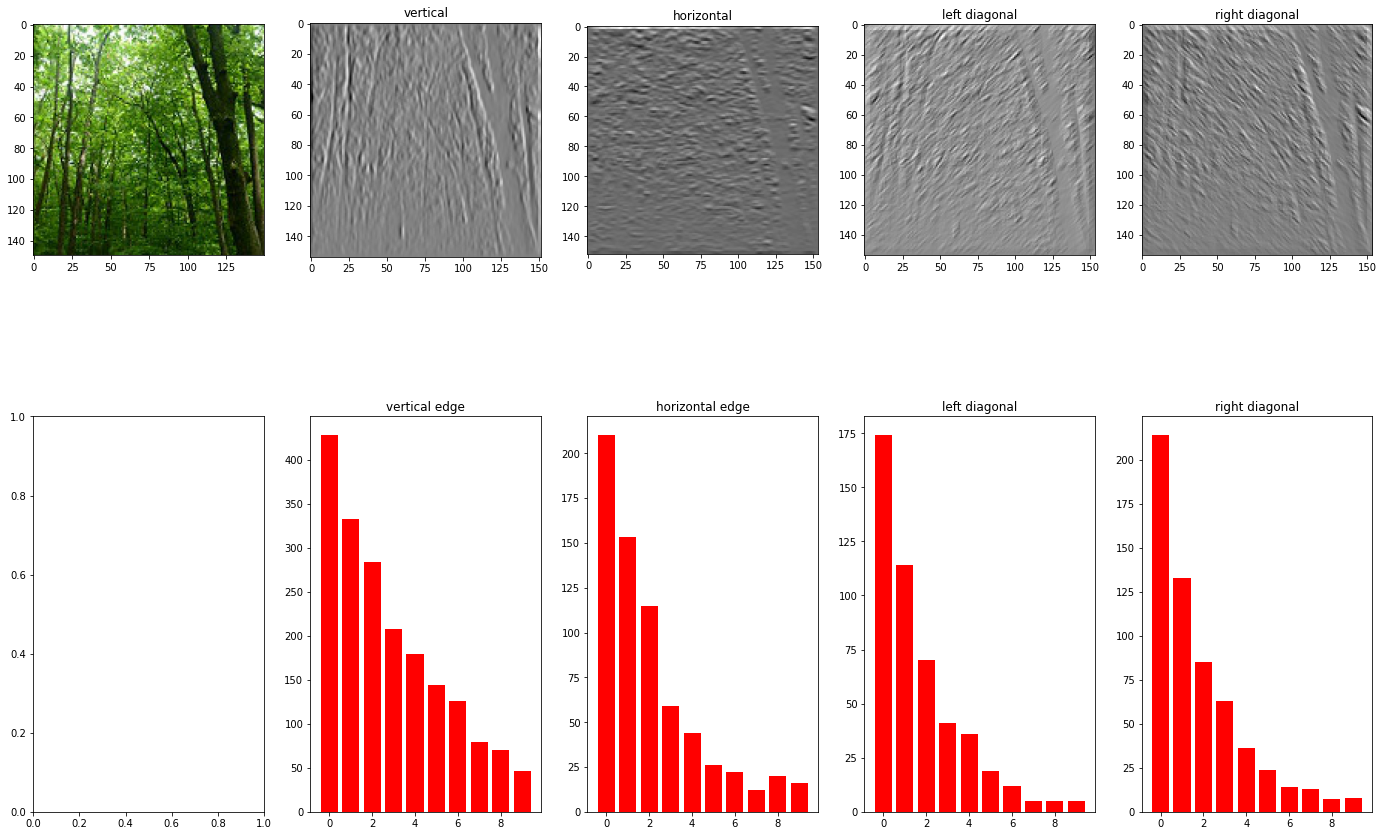

In [110]:
show_edge_images( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/forest/8.jpg') )

vert edge: [265 211 192 242 201 146 131 136 136 112]
vert edge: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
horz edge: [173 162 151 122 123 134 133 109  75 102]
horz edge: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
dia1: [130  95  79  51  46  18  10   9   6   2]
dia1: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]
dia2: [168 102  73  50  39  14  19   5   2   6]
dia2: [ 500.  550.  600.  650.  700.  750.  800.  850.  900.  950. 1000.]


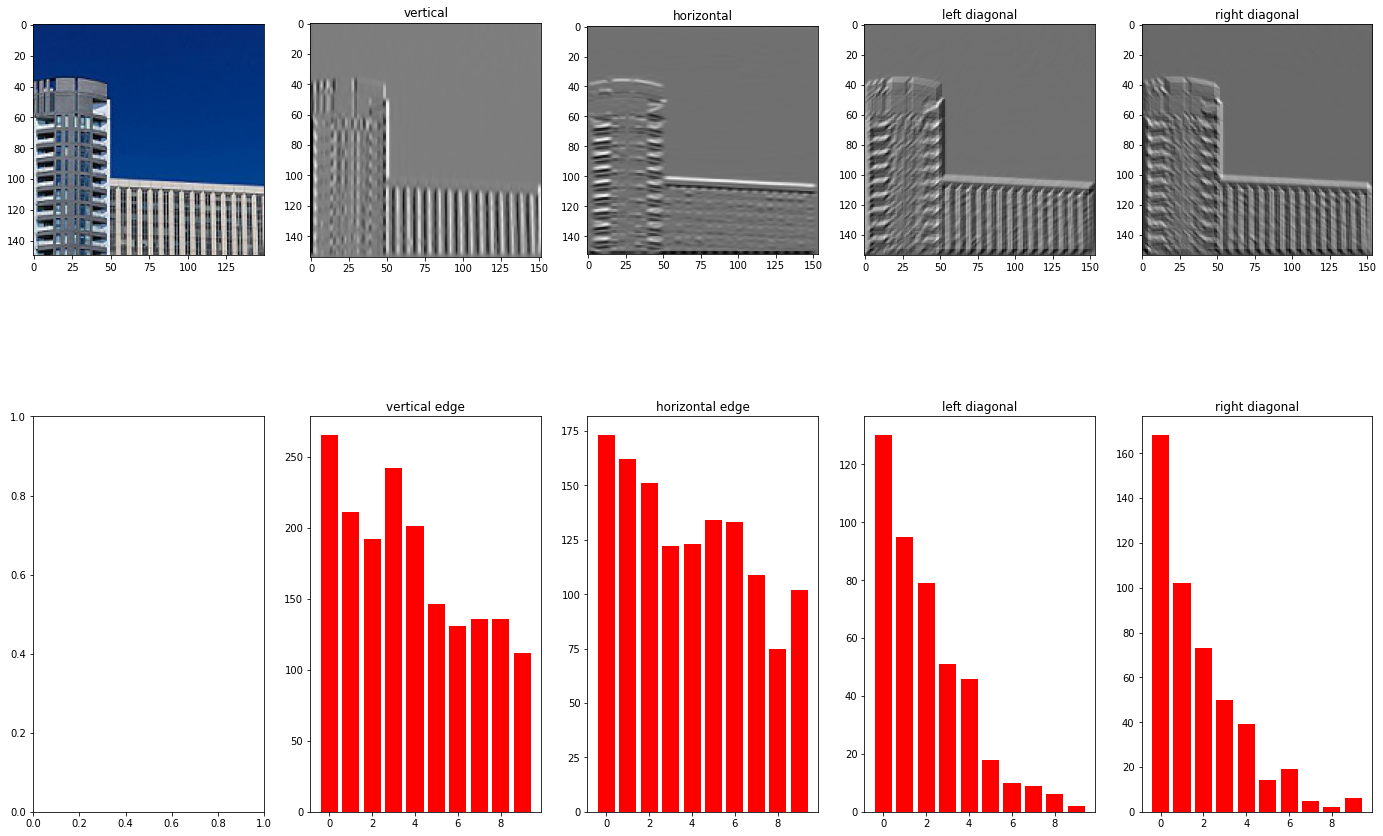

In [111]:
show_edge_images( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/buildings/463.jpg') )
#show_edge_images( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/buildings/315.jpg') )

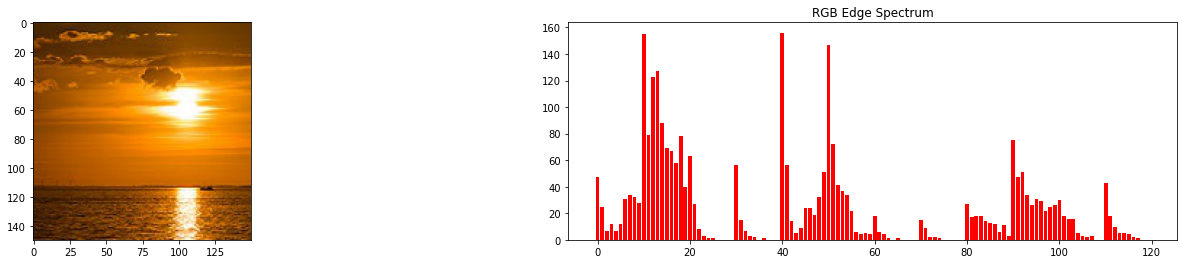

In [112]:
show_edge_histogram(plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/sea/200.jpg') )

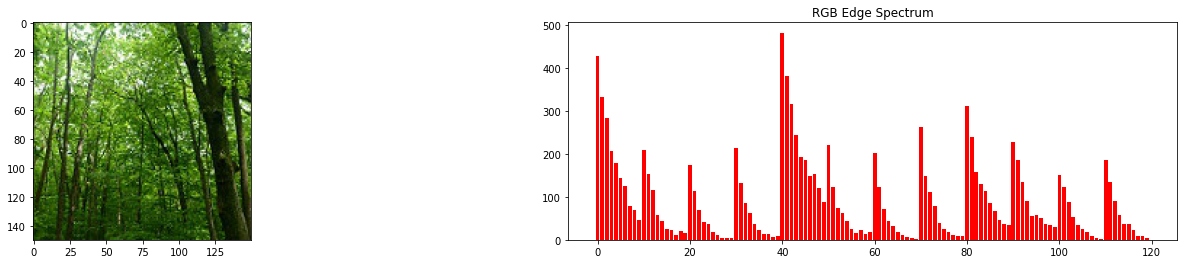

In [113]:
show_edge_histogram( plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/forest/8.jpg') )

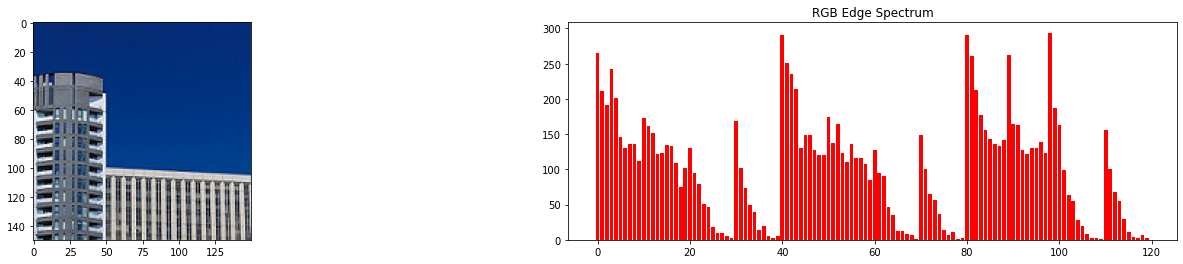

In [114]:
show_edge_histogram(plt.imread('/content/gdrive/MyDrive/Colab Notebooks/aida_image_project/seg_train/seg_train/buildings/463.jpg') )

# DataFrame-Builder

In [24]:
import pandas as pd

In [25]:

df_Data_train = None
df_Data_test  = None


In [158]:
del df_Data_train
del df_Data_test

In [26]:

if df_Data_train is None:
  print('create df_Data_train')
  df_Data_train = pd.DataFrame(columns=[ 'ClassName', 'Class', 'R', 'G', 'B'])

if df_Data_test is None:
  print('create df_Data_test')
  df_Data_test = pd.DataFrame(columns=[ 'ClassName', 'Class', 'R', 'G', 'B'])

df_Data_train


create df_Data_train
create df_Data_test


Empty DataFrame
Columns: [ClassName, Class, R, G, B]
Index: []

In [27]:

def dict_from_bins( bins, col_prefix='' ):
  keys = [col_prefix + str(i) for i in range( len(bins) )]
  vals = list(bins)
  return dict( zip(keys, vals) )

def dict_from_bins_3digits( bins, col_prefix='' ):
  keys = [col_prefix + "{:03d}".format(i) for i in range( len(bins) )]
  vals = list(bins)
  return dict( zip(keys, vals) )

def dict_from_bins_4digits( bins, col_prefix='' ):
  keys = [col_prefix + "{:04d}".format(i) for i in range( len(bins) )]
  vals = list(bins)
  return dict( zip(keys, vals) )


In [35]:

def get_build_data_table(df_Data_, iterations_, data_iterator_=train_img_iterator):

  for it in range(iterations_):

    if (it % 2) == 0:
      print('Still fetching data and building data table ', it)

    data_batch = data_iterator_.next()

    imgs   = data_batch[0]
    labels = data_batch[1]

    for img, lbl in zip(imgs, labels):

      (r,g,b) = get_RGB_mean(img)

      row1 = {
                  'ClassName' : class_index_dict[np.argmax(lbl)] , 
                  'Class'     : np.argmax(lbl),              
                  'R'         : r, 
                  'G'         : g, 
                  'B'         : b
                  }

      # one-hot-encoded labels
      c_dict = dict_from_bins( lbl, col_prefix='C_')

      # Color-Spectren
      r_dict = dict_from_bins( get_Histogramm(img, RED,  range=COLOR_RANGE)[0], col_prefix='R_')
      g_dict = dict_from_bins( get_Histogramm(img, GREEN,range=COLOR_RANGE)[0], col_prefix='G_')
      b_dict = dict_from_bins( get_Histogramm(img, BLUE, range=COLOR_RANGE)[0], col_prefix='B_')

      # ORB-Feature  ---------------------------------
      # kp__, des = orb.detectAndCompute(img, None)

      # if des is None:
      #   print('des is None')

      # des_dict = descriptor(des, len_=320, pref_='d_')
      # ORB-Feature  ---------------------------------

      # Edge-Spectren
      e_dict = dict_from_bins_3digits( histogram_edge_images(img), col_prefix='e_')

      # Concat the dictonaries per row
      new_row = {**row1, **c_dict, **r_dict, **g_dict, **b_dict, **e_dict}  #, **des_dict} 

      # append a row
      df_Data_ = df_Data_.append( new_row, ignore_index=True )
  print('Finished')
  return df_Data_
  

### RGB Min-Max-Scaler Function

In [29]:

def min_max_scaler_RGB(df_Data_):

  max_ = df_Data_.filter( regex='^R_|^G_|^B_', axis=1).max().max()
  min_ = df_Data_.filter( regex='^R_|^G_|^B_', axis=1).min().min()

  for col in df_Data_:
    if col.startswith('R_') or col.startswith('G_') or col.startswith('B_') :
      df_Data_[col] = df_Data_[col].apply( lambda x: ((x - min_) / (max_ - min_)) )

  return df_Data_



def min_max_scaler_Edge(df_Data_):

  max_ = df_Data_.filter( regex='^e_', axis=1).max().max()
  min_ = df_Data_.filter( regex='^e_', axis=1).min().min()

  for col in df_Data_:
    if col.startswith('e_'):
      df_Data_[col] = df_Data_[col].apply( lambda x: ((x - min_) / (max_ - min_)) )

  return df_Data_


In [30]:
def get_MinMaxRGB(df_Data_):
  return df_Data_.filter( regex='^R_|^G_|^B_', axis=1).min().min(), \
         df_Data_.filter( regex='^R_|^G_|^B_', axis=1).max().max()

def get_MinMaxEdge(df_Data_):
  return df_Data_.filter( regex='^e_', axis=1).min().min(), \
         df_Data_.filter( regex='^e_', axis=1).max().max()

# Now get the data and build the data table...

In [31]:
df_Data_train = get_build_data_table(df_Data_train, 30)

Still fetching data and building data table  0
Still fetching data and building data table  2
Still fetching data and building data table  4
Still fetching data and building data table  6
Still fetching data and building data table  8
Still fetching data and building data table  10
Still fetching data and building data table  12
Still fetching data and building data table  14
Still fetching data and building data table  16
Still fetching data and building data table  18
Still fetching data and building data table  20
Still fetching data and building data table  22
Still fetching data and building data table  24
Still fetching data and building data table  26
Still fetching data and building data table  28
Finished


In [41]:
df_Data_test = get_build_data_table(df_Data_test, 10, data_iterator_=test_img_iterator)

Still fetching data and building data table  0
Still fetching data and building data table  2
Still fetching data and building data table  4
Still fetching data and building data table  6
Still fetching data and building data table  8
Finished


## ... and scale the data

In [42]:
def data_Scaler(df_Data_):
  print('RGB  (min,max): ', get_MinMaxRGB(df_Data_))
  print('Edge (min,max): ', get_MinMaxEdge(df_Data_))

  df_Data_ = min_max_scaler_RGB(df_Data_)
  df_Data_ = min_max_scaler_Edge(df_Data_)

  print('RGB  (min,max): ', get_MinMaxRGB(df_Data_))
  print('Edge (min,max): ', get_MinMaxEdge(df_Data_))

  return df_Data_


In [44]:
data_Scaler(df_Data_train)
data_Scaler(df_Data_test)

RGB  (min,max):  (0.0, 3757.0)
Edge (min,max):  (0.0, 4524.0)
RGB  (min,max):  (0.0, 1.0)
Edge (min,max):  (0.0, 1.0)
RGB  (min,max):  (0.0, 3284.0)
Edge (min,max):  (0.0, 2909.0)
RGB  (min,max):  (0.0, 1.0)
Edge (min,max):  (0.0, 1.0)


ClassName Class           R  ...     e_117     e_118     e_119
0      glacier     2  102.800003  ...  0.004125  0.003781  0.000688
1      glacier     2  107.099998  ...  0.001719  0.001719  0.000688
2       street     5   91.000000  ...  0.004813  0.005844  0.002406
3     mountain     3   86.900002  ...  0.001031  0.003438  0.000688
4       street     5  113.199997  ...  0.001375  0.000688  0.000000
..         ...   ...         ...  ...       ...       ...       ...
315     forest     1  106.300003  ...  0.002750  0.003438  0.001375
316     forest     1   80.000000  ...  0.000000  0.001375  0.000000
317  buildings     0  118.000000  ...  0.001031  0.002406  0.000688
318  buildings     0  131.300003  ...  0.064283  0.052595  0.040220
319  buildings     0  101.099998  ...  0.004469  0.003781  0.003094

[320 rows x 161 columns]

## Color Spectren

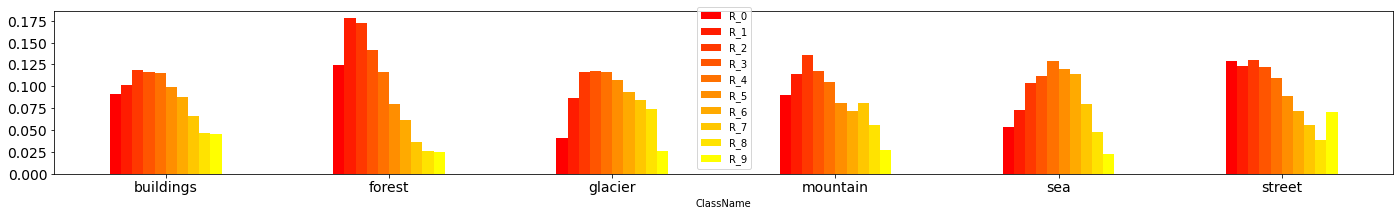

In [46]:
df_Data_train.filter( regex='^R_|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='autumn', rot=0);  plt.show()

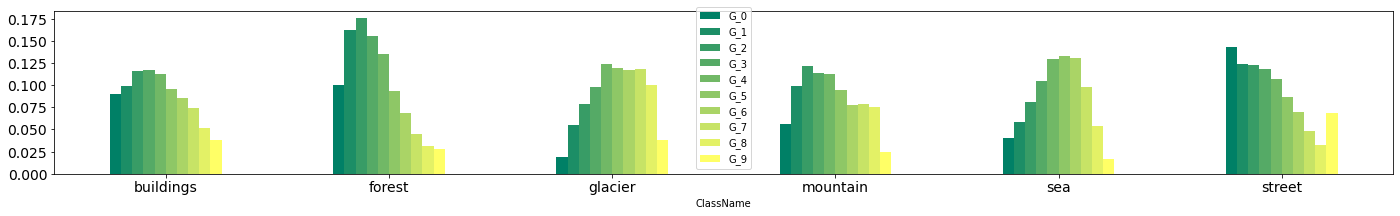

In [47]:
df_Data_train.filter( regex='^G_|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='summer', rot=0);  plt.show()

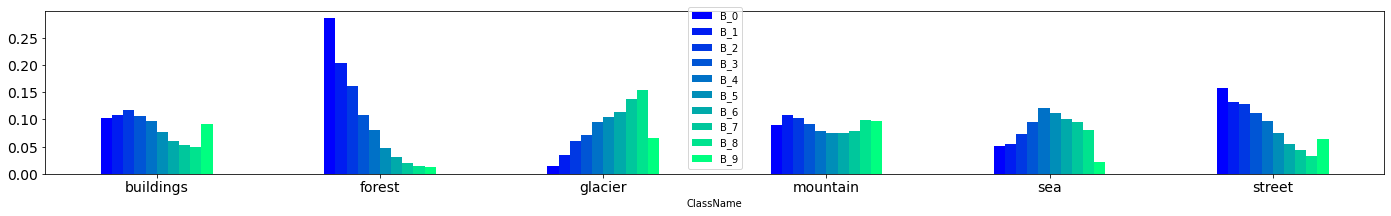

In [48]:
df_Data_train.filter( regex='^B_|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='winter', rot=0);  plt.show()

## Edge-Spectren

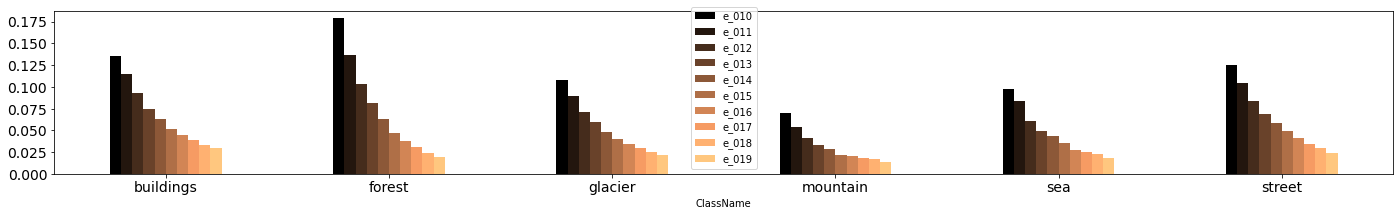

In [49]:
df_Data_train.filter( regex='^e_01|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='copper', rot=0);  plt.show()

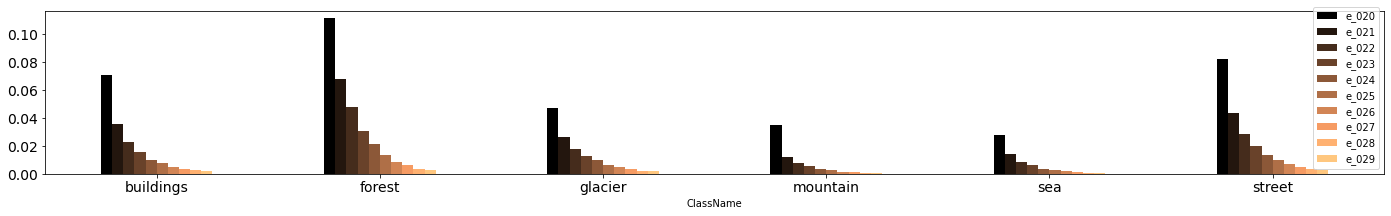

In [50]:
df_Data_train.filter( regex='^e_02|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='copper', rot=0);  plt.show()

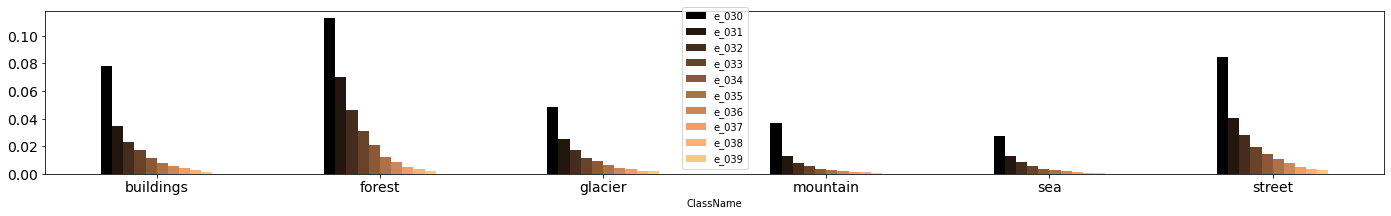

In [51]:
df_Data_train.filter( regex='^e_03|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='copper', rot=0);  plt.show()

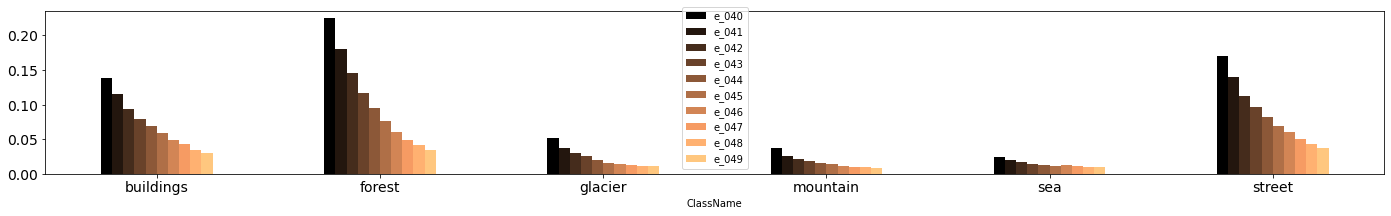

In [52]:
df_Data_train.filter( regex='^e_04|ClassName', axis=1).groupby(['ClassName']).median().plot.bar(  fontsize=14, figsize=(24,3), colormap='copper', rot=0);  plt.show()

### Count of classes in DataFrame

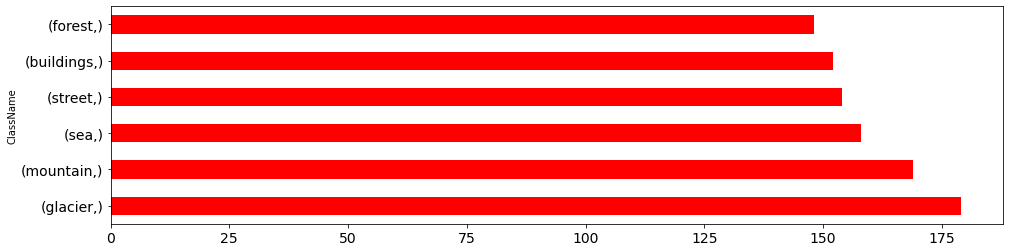

In [53]:
df_Data_train.value_counts(['ClassName']).plot.barh(color='red', fontsize=14, figsize=(16,4))

### Mean Color

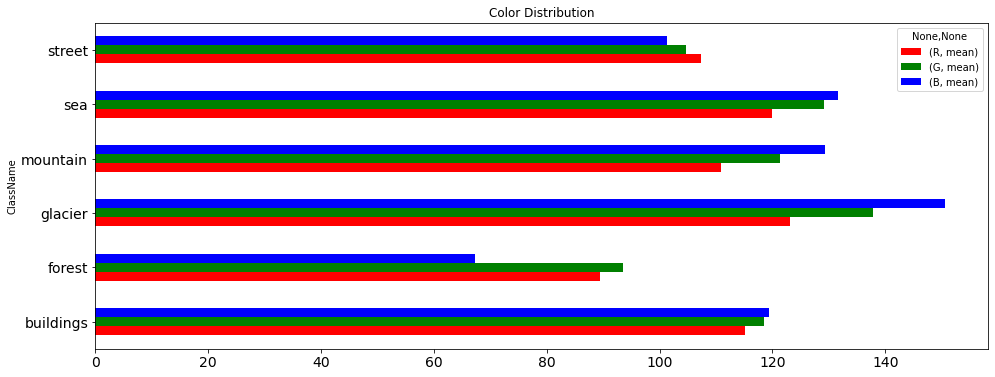

In [54]:

df_Data_train.groupby(['ClassName'])[['R', 'G', 'B']].agg(['mean']).plot.barh( color=['r','g','b'], fontsize=14, figsize=(16,6), title='Color Distribution' )


## Extract the X-Input-Feature-Matrix and the Y-Label-Vector

In [55]:
def get_X_Input_Feature_Matrix(df_Data_):
  return df_Data_.filter( regex='R|G|B|^R_|^G_|^B_|^e_', axis=1).to_numpy()
  #return df_Data_.filter( regex='R|G|B|^R_|^G_|^B_', axis=1).to_numpy()

In [56]:
def get_y_Label_Vector_OneHot(df_Data_):
  return df_Data_.filter( regex='^C_', axis=1).to_numpy()

def get_y_Label_Vector(df_Data_):
  return df_Data_['Class'].to_numpy()

In [57]:
X_train = get_X_Input_Feature_Matrix(df_Data_train)
y_train = get_y_Label_Vector(df_Data_train)

X_test = get_X_Input_Feature_Matrix(df_Data_test)
y_test = get_y_Label_Vector(df_Data_test)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)

print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (960, 153)
y_train.shape: (960,)
X_test.shape: (320, 153)
y_test.shape: (320,)


# Classifier

In [58]:
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

In [159]:
df_Result = pd.DataFrame()

## Multinomal Naive Bayes

In [160]:
model = MultinomialNB()


In [161]:

model.fit(X_train, list(y_train))


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [162]:

y_pred = model.predict(X_test)


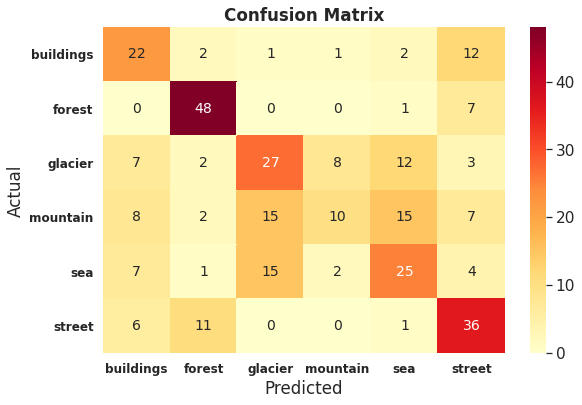

In [163]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

conf = confusion_matrix( list(y_test), list(y_pred))

df_cm = pd.DataFrame( conf, columns=list(class_index_dict.values()), index = list(class_index_dict.values()) )
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (9,6))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap='YlOrRd', annot=True, annot_kws={"size": 14})
plt.title("Confusion Matrix", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

### Accuracy

In [164]:
from sklearn.metrics import accuracy_score


acc_multi_nb = round( accuracy_score( list(y_test), y_pred), 2)
acc_multi_nb

0.52

### Accuracy per Class

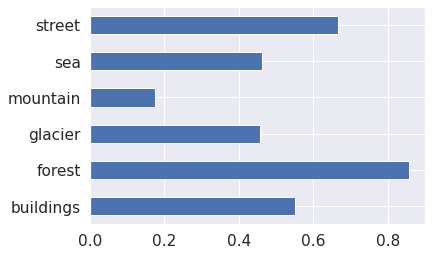

In [165]:

conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

accuracy_per_class = conf_norm.diagonal()

pd.Series( accuracy_per_class, index=list(class_index_dict.values())).plot.barh();  plt.show()


In [166]:
df_Result = build_Result( df_Result, 'Multi Naive Bayes', acc_multi_nb, accuracy_per_class)


## Random-Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

forest_class = RandomForestClassifier()

forest_class.fit( X_train, list(y_train) )

y_pred = forest_class.predict( X_test )

from sklearn.metrics import accuracy_score

acc_forest = round( accuracy_score( list(y_test), y_pred ),  2)

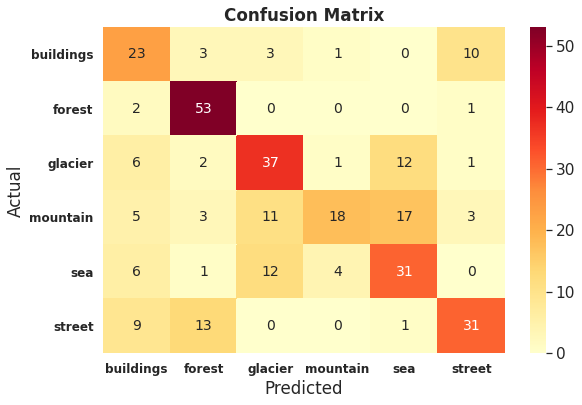

In [168]:
conf = confusion_matrix( list(y_test), list(y_pred))

df_cm = pd.DataFrame( conf, columns=list(class_index_dict.values()), index = list(class_index_dict.values()) )
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (9,6))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap='YlOrRd', annot=True, annot_kws={"size": 14})
plt.title("Confusion Matrix", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

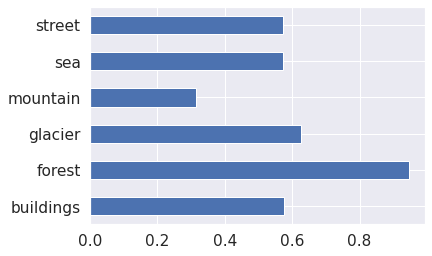

In [169]:
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

accuracy_per_class = conf_norm.diagonal()

pd.Series( accuracy_per_class, index=list(class_index_dict.values())).plot.barh();  plt.show()

In [170]:

df_Result = build_Result( df_Result, 'Random Forest', acc_forest, accuracy_per_class)


In [183]:
model = svm.LinearSVC(max_iter=50000)

model.fit( X_train, list(y_train) )

y_pred = model.predict( X_test )

svm_forest = round( accuracy_score( list(y_test), y_pred ),  2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [184]:
svm_forest

0.52

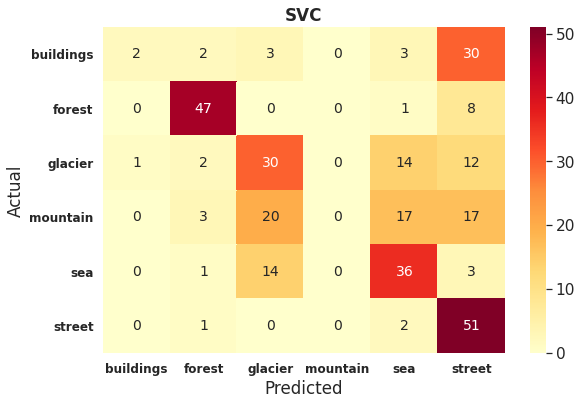

In [185]:
conf = confusion_matrix( list(y_test), list(y_pred))

df_cm = pd.DataFrame( conf, columns=list(class_index_dict.values()), index = list(class_index_dict.values()) )
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (9,6))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap='YlOrRd', annot=True, annot_kws={"size": 14})
plt.title("SVC", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

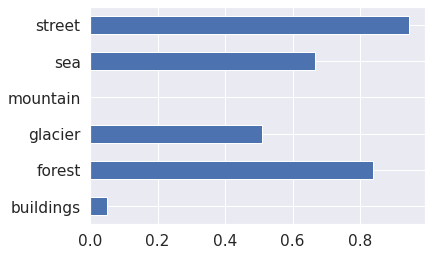

In [186]:
conf_norm = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]

accuracy_per_class = conf_norm.diagonal()

pd.Series( accuracy_per_class, index=list(class_index_dict.values())).plot.barh();  plt.show()

In [187]:
df_Result = build_Result( df_Result, 'Support Vector Machine', svm_forest, accuracy_per_class)


# Overall Accuracies

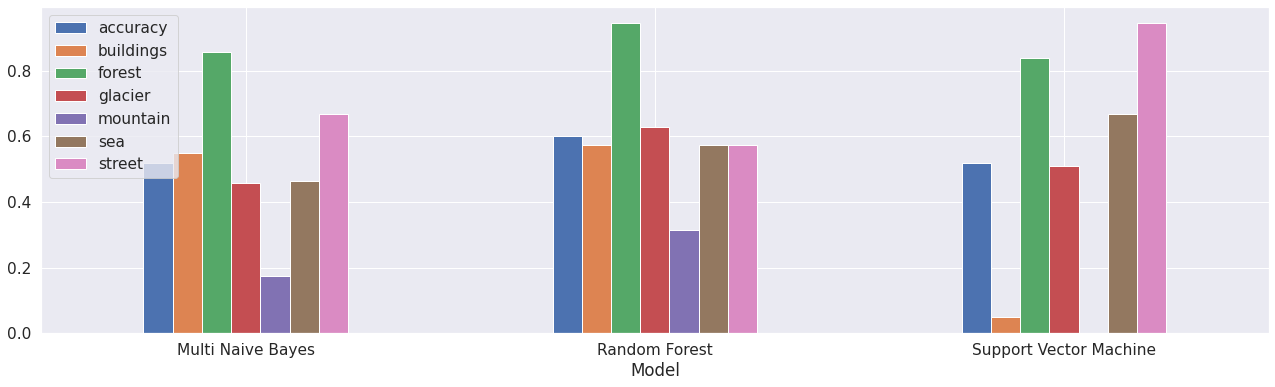

In [192]:
df_Result.groupby(['Model']).max().plot.bar(  figsize=(22,6), rot=0 ); 
plt.legend(loc='upper left')
plt.show()


In [151]:

def build_Result( df_Result_, model_, accuracy_, acc_per_class_):
  row1 = { 'Model'   : model_,
           'accuracy': accuracy_}

  keys = list(class_index_dict.values())
  vals = list(acc_per_class_)
  a_dict = dict( zip(keys, vals) )

  new_row = {**row1, **a_dict} 

  df_Result_ = df_Result_.append( new_row, ignore_index=True )
  return df_Result_


# Result: 

1.   Problem to distinguish the high-correlated classes builings and streets.
2.   Problem to distinguish the high-correlated classes glacier and mountain.



